In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

uploaded = files.upload()

Saving 202501_기준금속.xlsx to 202501_기준금속 (3).xlsx


In [47]:
df = pd.read_excel('202501_기준금속.xlsx')

In [48]:
# 금속 컬럼 추출
column_pattern = ['(ng/m3)', '(ug/m3)']
columns_to_analyze = [c for c in df.columns if any(p in c for p in column_pattern)]

In [53]:
# X축과 Y축 정의
xcol = 'Conc(ug/m3)'
ycols = [c for c in columns_to_analyze if c != xcol]

In [60]:
# 산점도, 회귀선 함수 정의
def plot_scatter_with_regression_improved(x, y, data, ax):
    # x축과 y축 동시에 데이터 추출
    df_xy = data[[x, y]].dropna()

    # 회귀, 상관 불가 상황 처리
    if len(df_xy) < 3 or df_xy[x].std() == 0 or df_xy[y].std() == 0:
        sns.scatterplot(x=x, y=y, data=df_xy, ax=ax, s=20, alpha=0.7, edgecolor=None)
        ax.set_title(f"{x} vs {y}\nInsufficient or constant data")
        return None

    # 산점도 그리기
    sns.scatterplot(x=x, y=y, data=df_xy, ax=ax, s=20, alpha=0.7, edgecolor=None)

    # 선형회귀선 계산
    X_vals = df_xy[[x]].to_numpy()
    y_vals = df_xy[y].to_numpy()
    model = LinearRegression().fit(X_vals, y_vals)
    y_pred = model.predict(X_vals)
    r2 = model.score(X_vals, y_vals)

    # X 오름차순 정렬 후 회귀선 그리기
    order = np.argsort(X_vals.ravel())
    ax.plot(X_vals.ravel()[order], y_pred[order], linewidth=2)

    # 그래프 축 라벨, 제목 설정
    slope = float(model.coef_[0])
    intercept = float(model.intercept_)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(
        f"{y}"
        f"R²={r2:.3f}, r={r:.3f} (p={p:.3g}), slope={slope:.3f}, intercept={intercept:.3f}")

    return {"R2": r2, "r": r, "p": p, "slope": slope, "intercept": intercept}

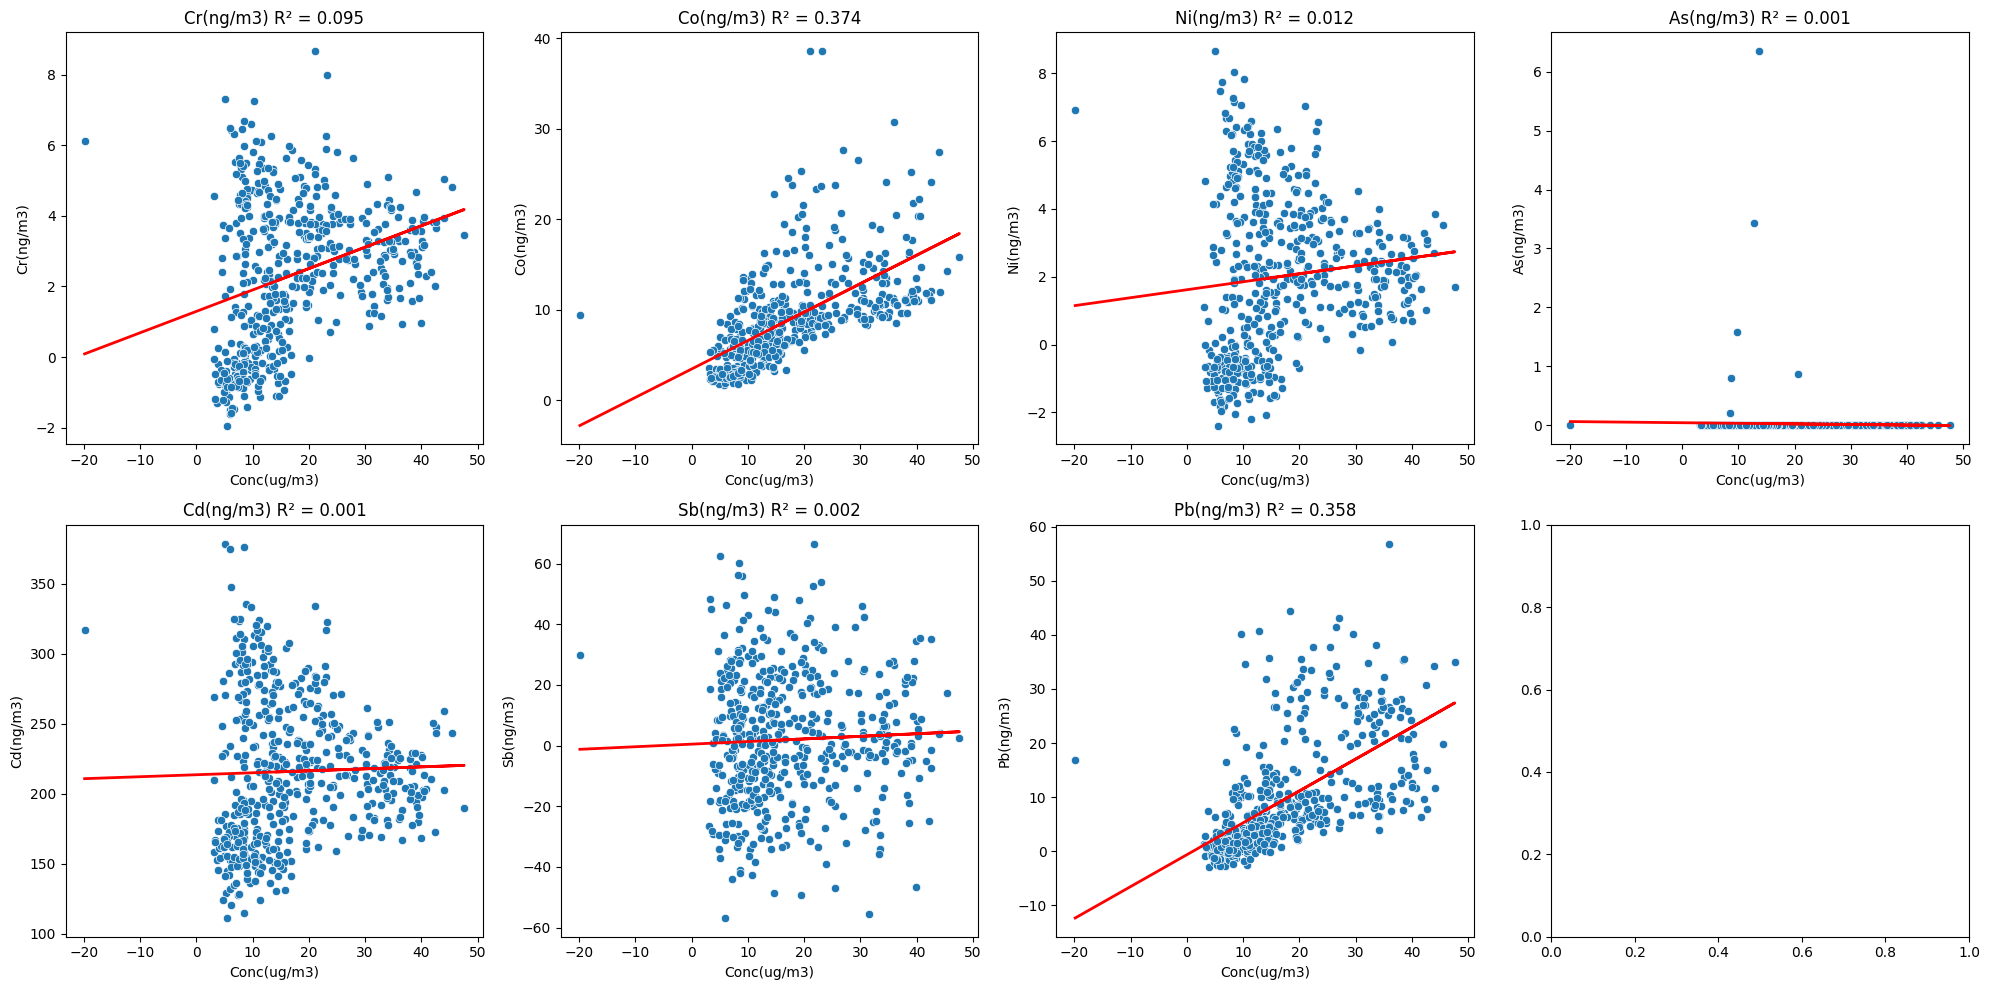

In [61]:
# 산점도 그래프 생성
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.flatten()

for i, metal in enumerate(columns_to_analyze[1:]):  # Conc 제외 금속들만
    plot_scatter_with_regression('Conc(ug/m3)', metal, df, axes[i])

plt.tight_layout()
plt.show()